custo computacional x numero de spikes
custo computacional x fração do datases
custo computacional x erro relativo devido á fração do dataset

In [11]:
a=[[1,2,3],[1,2,3]]
b=[[4,3,2],[5,6,8]]
a=np.array(a)
b=np.array(b)
c=abs(a-b)/a
print(c)

[[ 3.          0.5         0.33333333]
 [ 4.          2.          1.66666667]]


In [6]:
import numpy as np
import imp

%matplotlib inline
import matplotlib.pyplot as plt
from klusta.kwik import KwikModel
#from phy.io import KwikModel
import matplotlib as mpl
from pylab import *

import ipywidgets as widgets
from IPython.display import display
import time

import sys 
sys.path.append('/home/harison/UFPE/IC/src/ipy/classes/') 
import kwikfile as kf


class ColorMap:
    """!  @brief model that returns an average detection of each site of a given kwik file.
    
    @author: Harison P B de Oliveira
    @date: 2018.May.23
    """
    
    def __init__(self,path=None):
        if path is None:
            print ("It still with no path")
        else:
            self.kwik_model=[]
            self.kwikfile=[]
            for i in range(0,6):
                kpath = path+'/0'+str(i+1)+'/g0'+str(i+1)+'.kwik'
                self.kwik_model.append(KwikModel(kpath));
                self.kwikfile.append(kf.KwikFile(kpath))
            print(self.kwikfile[0])
            #self.kwik_model=KwikModel(kpath)
            #self.kwikfile=kf.KwikFile(kpath)
            #self.kpath=kpath
            #if name is None:
            #    self.name=self.kwikfile.name
            #else:
            #    self.name=name
            #print ("Created class on = %s !" % self.kpath)
            
    def get_median_amplitude_group(self,porc=1):
        """!  @brief Returns the average amplitude of all sites of the non-noisy groups.
    
        @author: Harison P B de Oliveira
        @date: 2018.Jun.07
        """
        
        a=np.zeros((6,10))
        for shank in range(0,6):
            spk_id=self.kwikfile[shank].all_spike_id_on_groups(group_names=
                                                               self.kwikfile[shank].list_of_non_noisy_groups())
            print(len(spk_id))
            LL=len(spk_id)
            w=self.kwik_model[shank].all_waveforms
            #wf=w[spk_id]
            L=int(porc*LL)
            for k in range(0,100):
                np.random.shuffle(spk_id)
            wf=w[spk_id[0:L]]
            
            median_amplitudes=dict()
            
            print("Shank 0"+str(shank+1)+":")
            print("Loading the average amplitude for each site.")
            
            amplitudes=[]
            A=dict()
            
            progress = widgets.IntProgress(min=0, description='Loading channels:'
                                       ,max=wf.shape[2])#add kwikfile
            display(progress)
            
            for elect in range(0,wf.shape[2]):#add kwikfile
                A[elect]=[]
                for i in range(0,len(wf)):
                    wave=wf[i,:,elect]
                    A[elect].append(np.max(wave)-np.min(wave))
                amplitudes.append(np.mean(A[elect]))
                progress.value += 1
            a[shank,:]=amplitudes
            """
        a=np.zeros((6,10))
        for i in range(0,6):
            a[i,:]=amplitudes
        """
        return a

        
    def plot_median_amplitude(self,amplitudes=None):
        """!  @brief Returns an image with maximum average amplitude of each site of a shank.
    
        @author: Harison P B de Oliveira
        @date: 2018.Jun.07
        """
        
        if amplitudes is None:
            return None
        else:
            fig,ax = plt.subplots(figsize=(60, 20))
            num_channels=len(amplitudes)

            posx=np.flipud (self.kwik_model[0].channel_positions [:,0])
            posy=np.flipud (self.kwik_model[0].channel_positions [:,1])
            #print(posx,posy)
            
            a=list()
            
            
            for shank in range(0,6):
                cmap = mpl.cm.jet
                #b=amplitudes[]
                norm = mpl.colors.Normalize(vmin=np.min(amplitudes[shank,:]), vmax=np.max(amplitudes[shank,:]))
                cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                        norm=norm,
                                        extend='both',
                                        extendfrac='auto',
                                        spacing='uniform',
                                        orientation='vertical') 
                dx=10
                offset=shank*200
                for ch in range (0,10):
                    if ch%2==0:
                        x_offset=posx[ch]+dx+offset
                    else:
                        x_offset=posx[ch]-dx+offset
                        dx+=10
                    #x_offset = posx[ch]
                    y_offset =posy[ch]*2
                    circle = plt.Circle((x_offset,y_offset),10,color=cb1.to_rgba(amplitudes[shank,ch]))
                    a.append(circle)
            
            ax.cla()
            ax.set_xlim((min(posx)-dx-10, max(posx)+dx+1100))
            ax.set_ylim((min(posy)*2-10, max(posy)*2+10))
            for i in range(0,len(a)):
                c=a[i]
                ax.add_artist(c)
            
            data = np.clip(randn(0, 0), -1, 1)
            cax = ax.imshow(data, interpolation='None', cmap=mpl.cm.jet)
            cbar = fig.colorbar(cax,ticks=[0,0.5,1],orientation='vertical')
            cbar.ax.set_yticklabels(['Low','Medium','High'])
            plt.gca().invert_yaxis()
            plt.axis('off')

            plt.show()
            fig.savefig('plot_6Apr.png')
            
            
        

In [7]:
#path='/home/harison/UFPE/data/2016Apr06'
path='/home/harison/UFPE/data/2016Mar15'
cm = ColorMap(path=path)


Created class on = /home/harison/UFPE/data/2016Mar15/01/g01.kwik !
Created class on = /home/harison/UFPE/data/2016Mar15/02/g02.kwik !
Created class on = /home/harison/UFPE/data/2016Mar15/03/g03.kwik !
Created class on = /home/harison/UFPE/data/2016Mar15/04/g04.kwik !
Created class on = /home/harison/UFPE/data/2016Mar15/05/g05.kwik !
Created class on = /home/harison/UFPE/data/2016Mar15/06/g06.kwik !


In [8]:
a=cm.get_median_amplitude_group(porc=0.01)

350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

In [36]:
a=[]
for i in [0.0001,0.001,0.01,0.1,1]:
    print(i)
    a.append(cm.get_median_amplitude_group(porc=i))

0.0001
350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

0.001
350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

0.01
350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

0.1
350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

1
350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

In [51]:
A=a[0]
B=a[4]

np.square(np.subtract(A, B)).mean()
print(A,B)
C=np.subtract(A, B)
print(A.shape,B.shape,C.shape)
print(np.std(C))


451.37732782276748

In [75]:
ref=a[4]
val=[]
for x in range(0,5):
    b=a[x]
    print(x,4,np.std(np.subtract(ref, b)).mean())
    val.append(np.std(np.subtract(ref, b)).mean())
print(np.min(a)) 

0 4 20.915306375
1 4 18.2507294337
2 4 16.3658671665
3 4 12.3659929461
4 4 0.0
35.1763191223


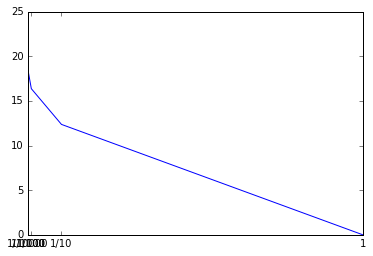

In [80]:
x=[1/10000,1/1000,1/100,1/10,1]
x_tick = np.array([])
for item in x:
    x_tick = np.append(x_tick,Fraction(item).limit_denominator())
plt.xticks(np.unique(x),x_tick)
plt.plot(x,val)

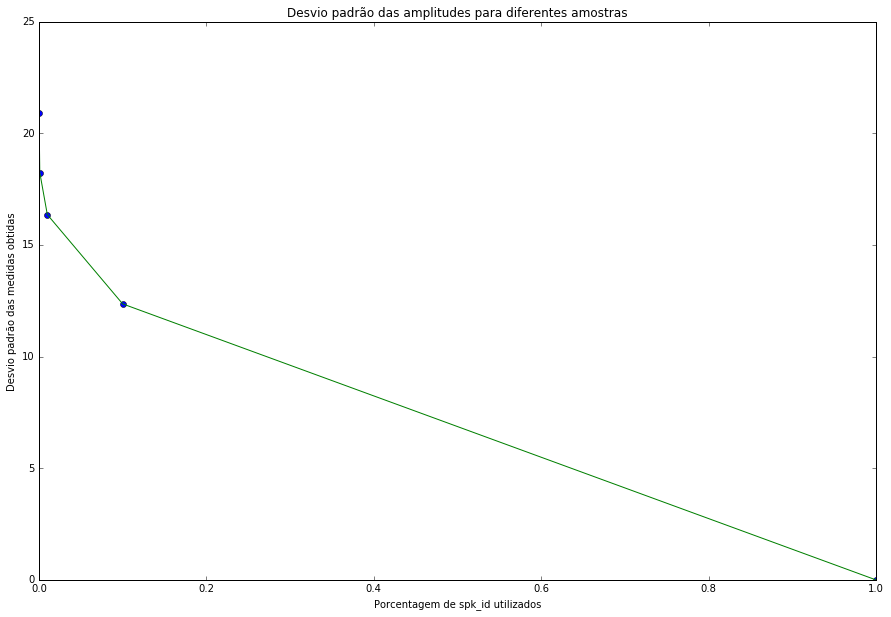

In [84]:
plt.figure(figsize=(15,10))
x=[1/10000,1/1000,1/100,1/10,1]
plt.plot(x,val,'o')
plt.plot(x,val)
plt.xlabel("Porcentagem de spk_id utilizados")
plt.ylabel("Desvio padrão das medidas obtidas")
plt.title("Desvio padrão das amplitudes para diferentes amostras")
savefig('std_amost.png')

In [55]:
ref=a[4]
for x in range(0,5):
    b=a[x]
    print(x,4,np.square(np.subtract(ref, b)).mean())
print(np.min(a))    

0 4 451.377327823
1 4 340.891555943
2 4 268.122366388
3 4 153.041916192
4 4 0.0
35.1763191223


In [18]:
import time
start_time = time.time()

a=cm.get_median_amplitude_group()

elapsed_time = time.time() - start_time
time.strftime("%M:%S", time.gmtime(elapsed_time))

350792
Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

221403
Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

165330
Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

426307
Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

609300
Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

238881
Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

'01:56'

In [9]:
a.shape[0]

6

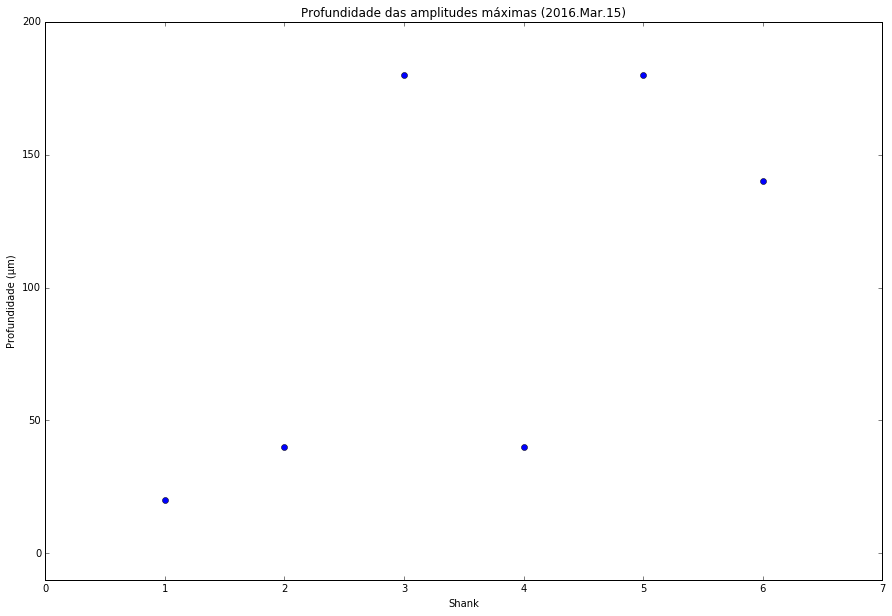

In [20]:
max_val=np.zeros((6))
max_pos=np.zeros((6))
for shank in range(0,a.shape[0]):
    max_val[shank]=np.max(a[shank,:])
    for site in range(0,a.shape[1]):
        if a[shank,site]==max_val[shank]:
            max_pos[shank]=site*20
"""
for i in max_pos:
    if i==0:
        max_pos[i]==180
    elif i==1:
        max_pos[i]==160
    elif i==2:
        max_pos[i]==140
    elif i==3:
        max_pos[i]==120
    elif i==4:
        max_pos[i]==100
    elif i==5:
        max_pos[i]==80
    elif i==6:
        max_pos[i]==60
    elif i==7:
        max_pos[i]==40
    elif i==8:
        max_pos[i]==20
    elif i==9:
        max_pos[i]==0
"""
t=[1,2,3,4,5,6]
plt.figure(figsize=(15,10))
plt.plot(t,max_pos,'o')
plt.xlim(0,7)
plt.ylim(-10,200)
plt.xlabel("Shank")
plt.ylabel("Profundidade (µm)")
plt.title("Profundidade das amplitudes máximas (2016.Mar.15)")
savefig('prof_15Mar.png')

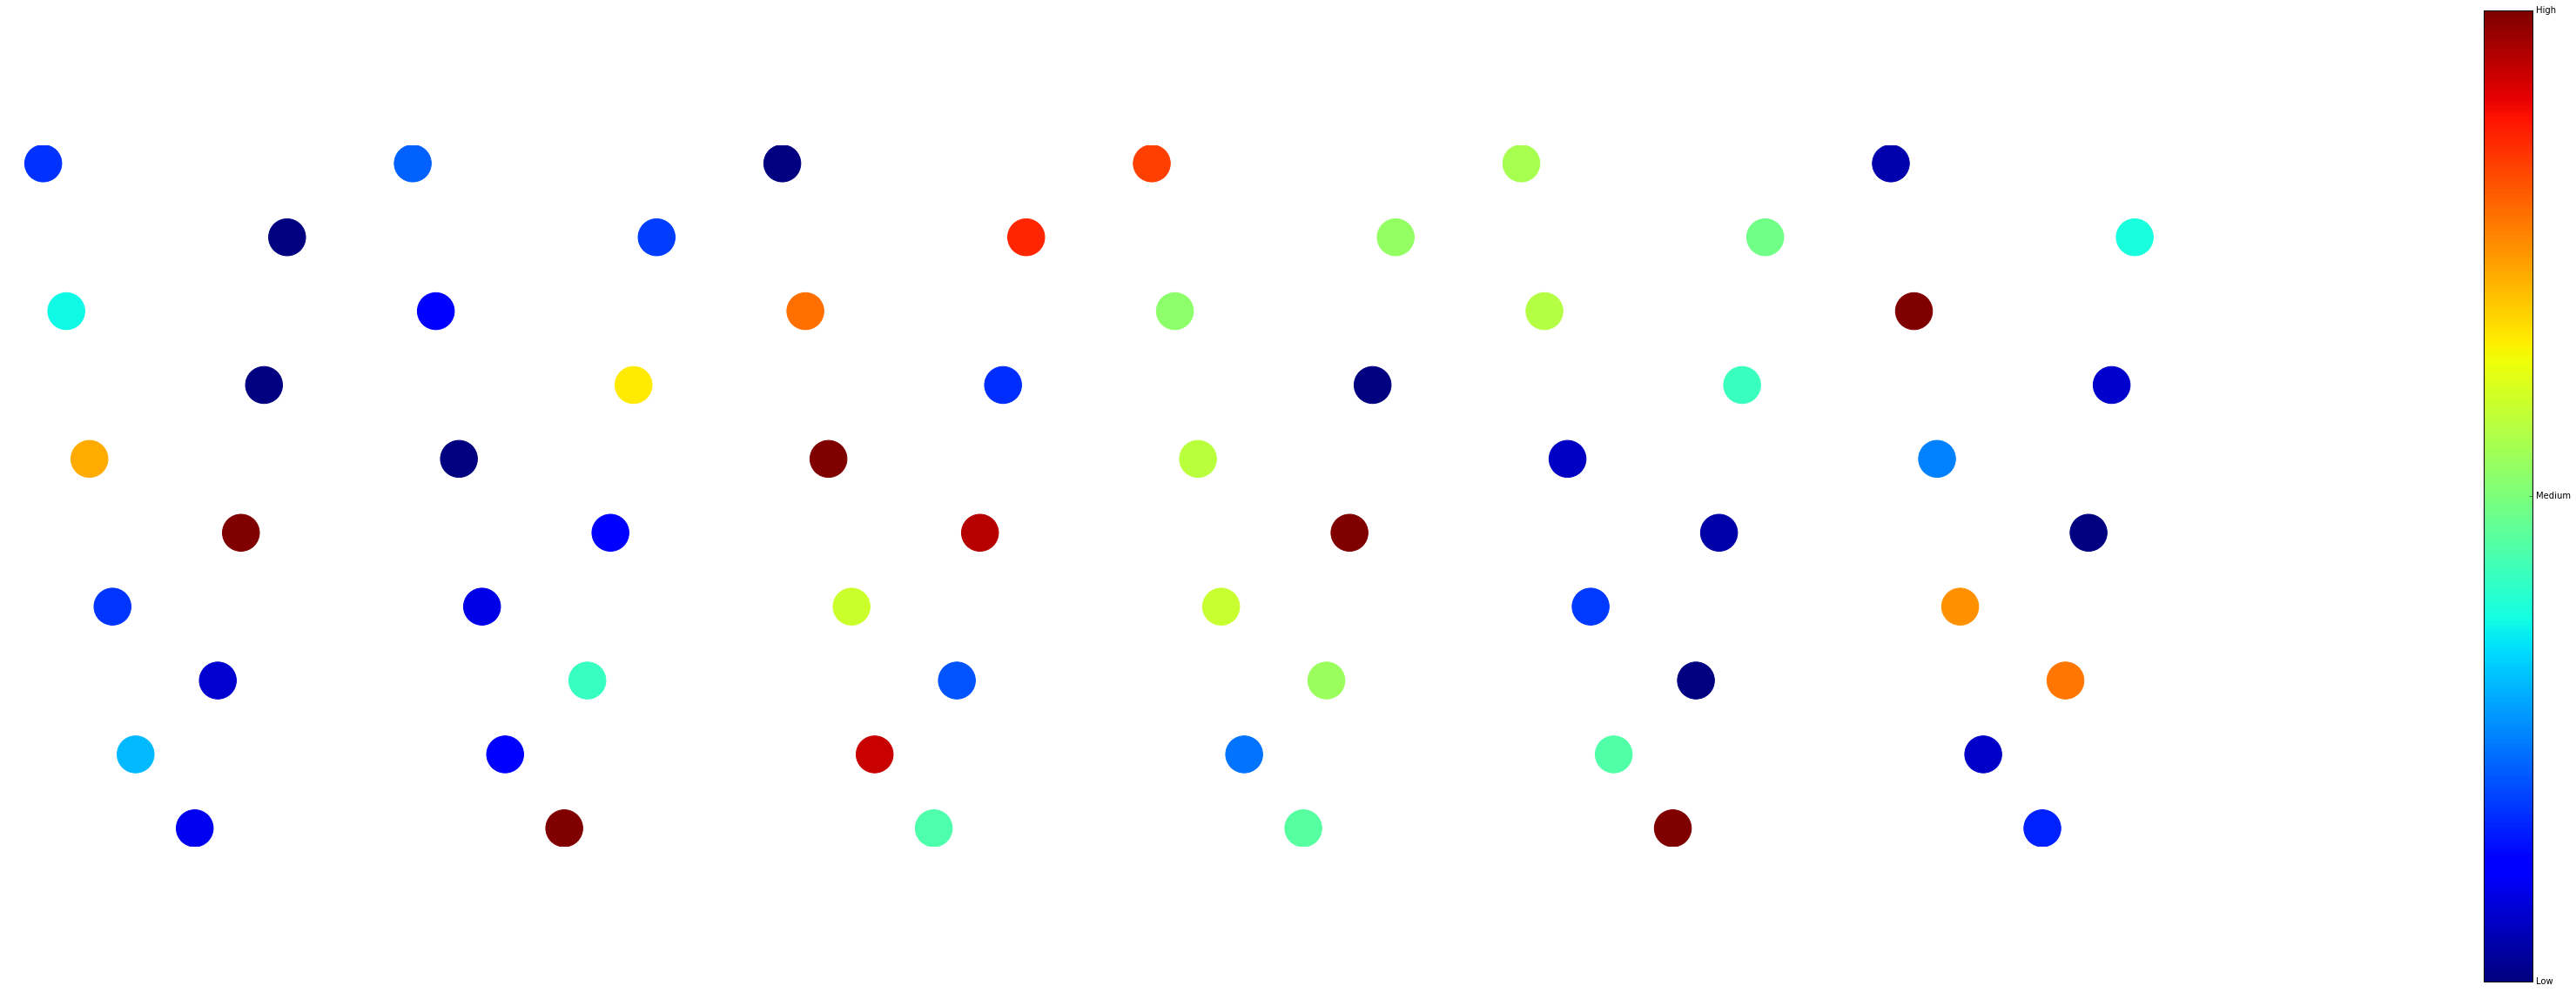

In [14]:
#15000
#print(a)
cm.plot_median_amplitude(amplitudes=a)

TypeError: 'numpy.ndarray' object is not callable

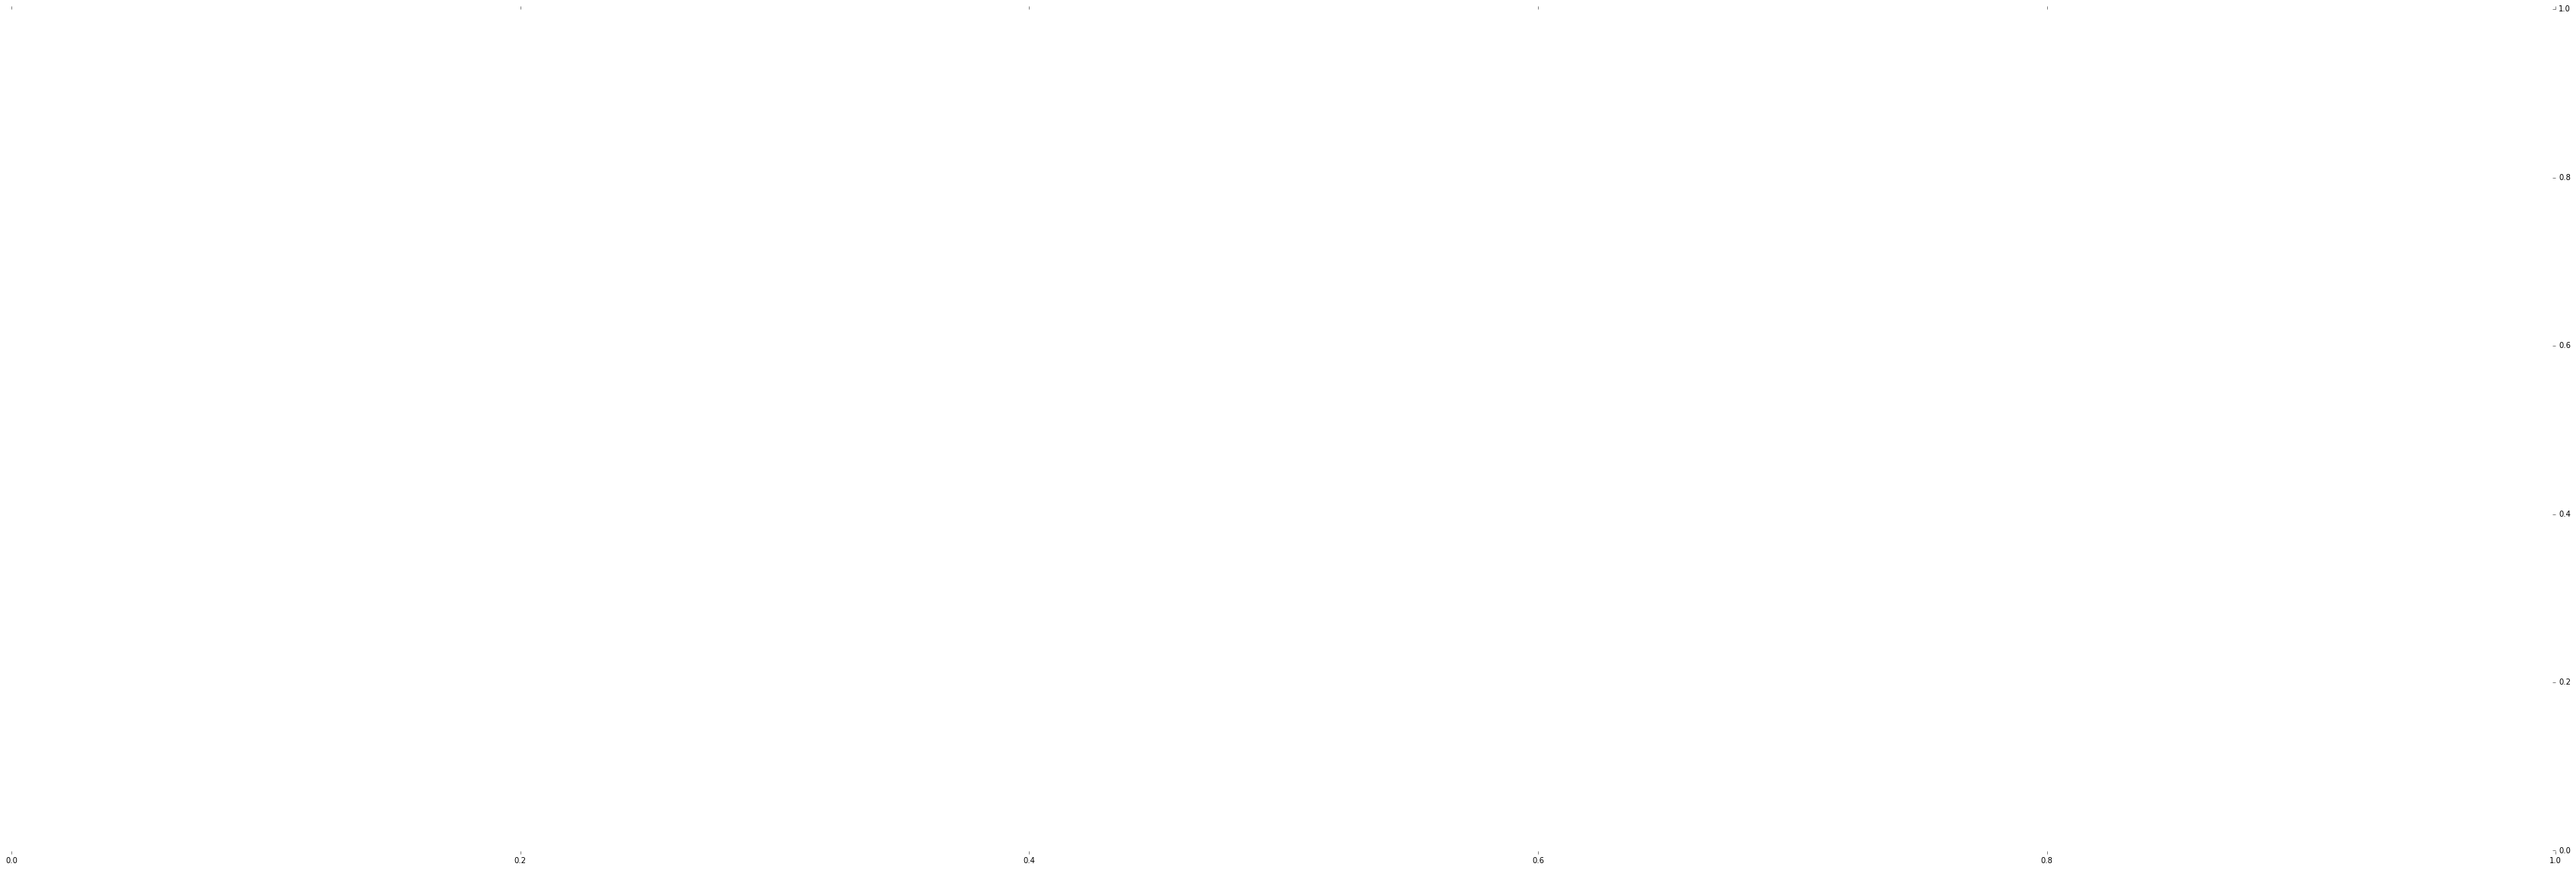

In [35]:
#30000
cm.plot_median_amplitude(amplitudes=a)

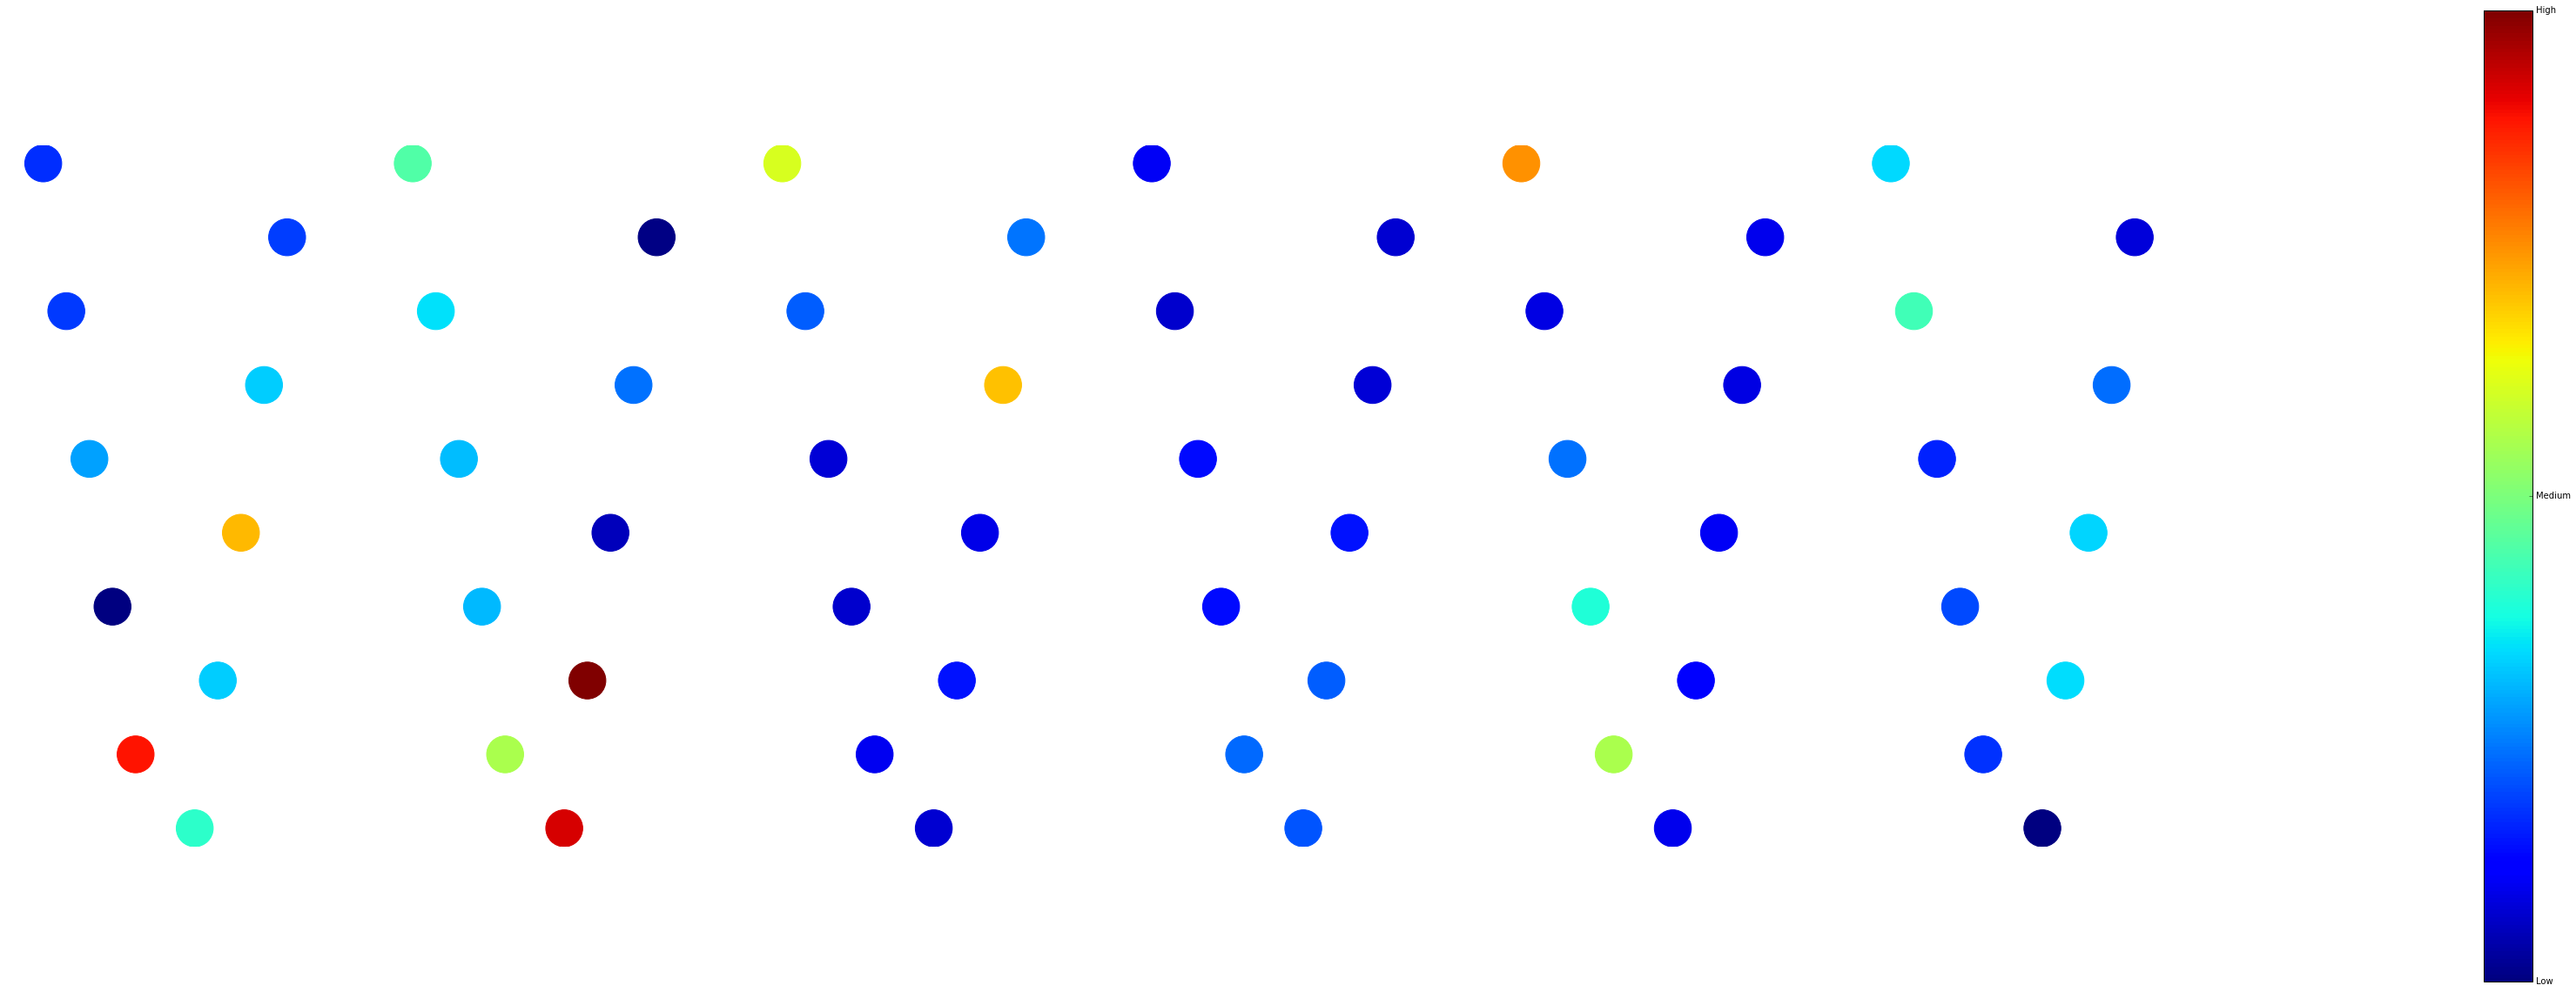

Shank 01:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

Shank 02:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

Shank 03:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

Shank 04:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

Shank 05:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

Shank 06:
Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

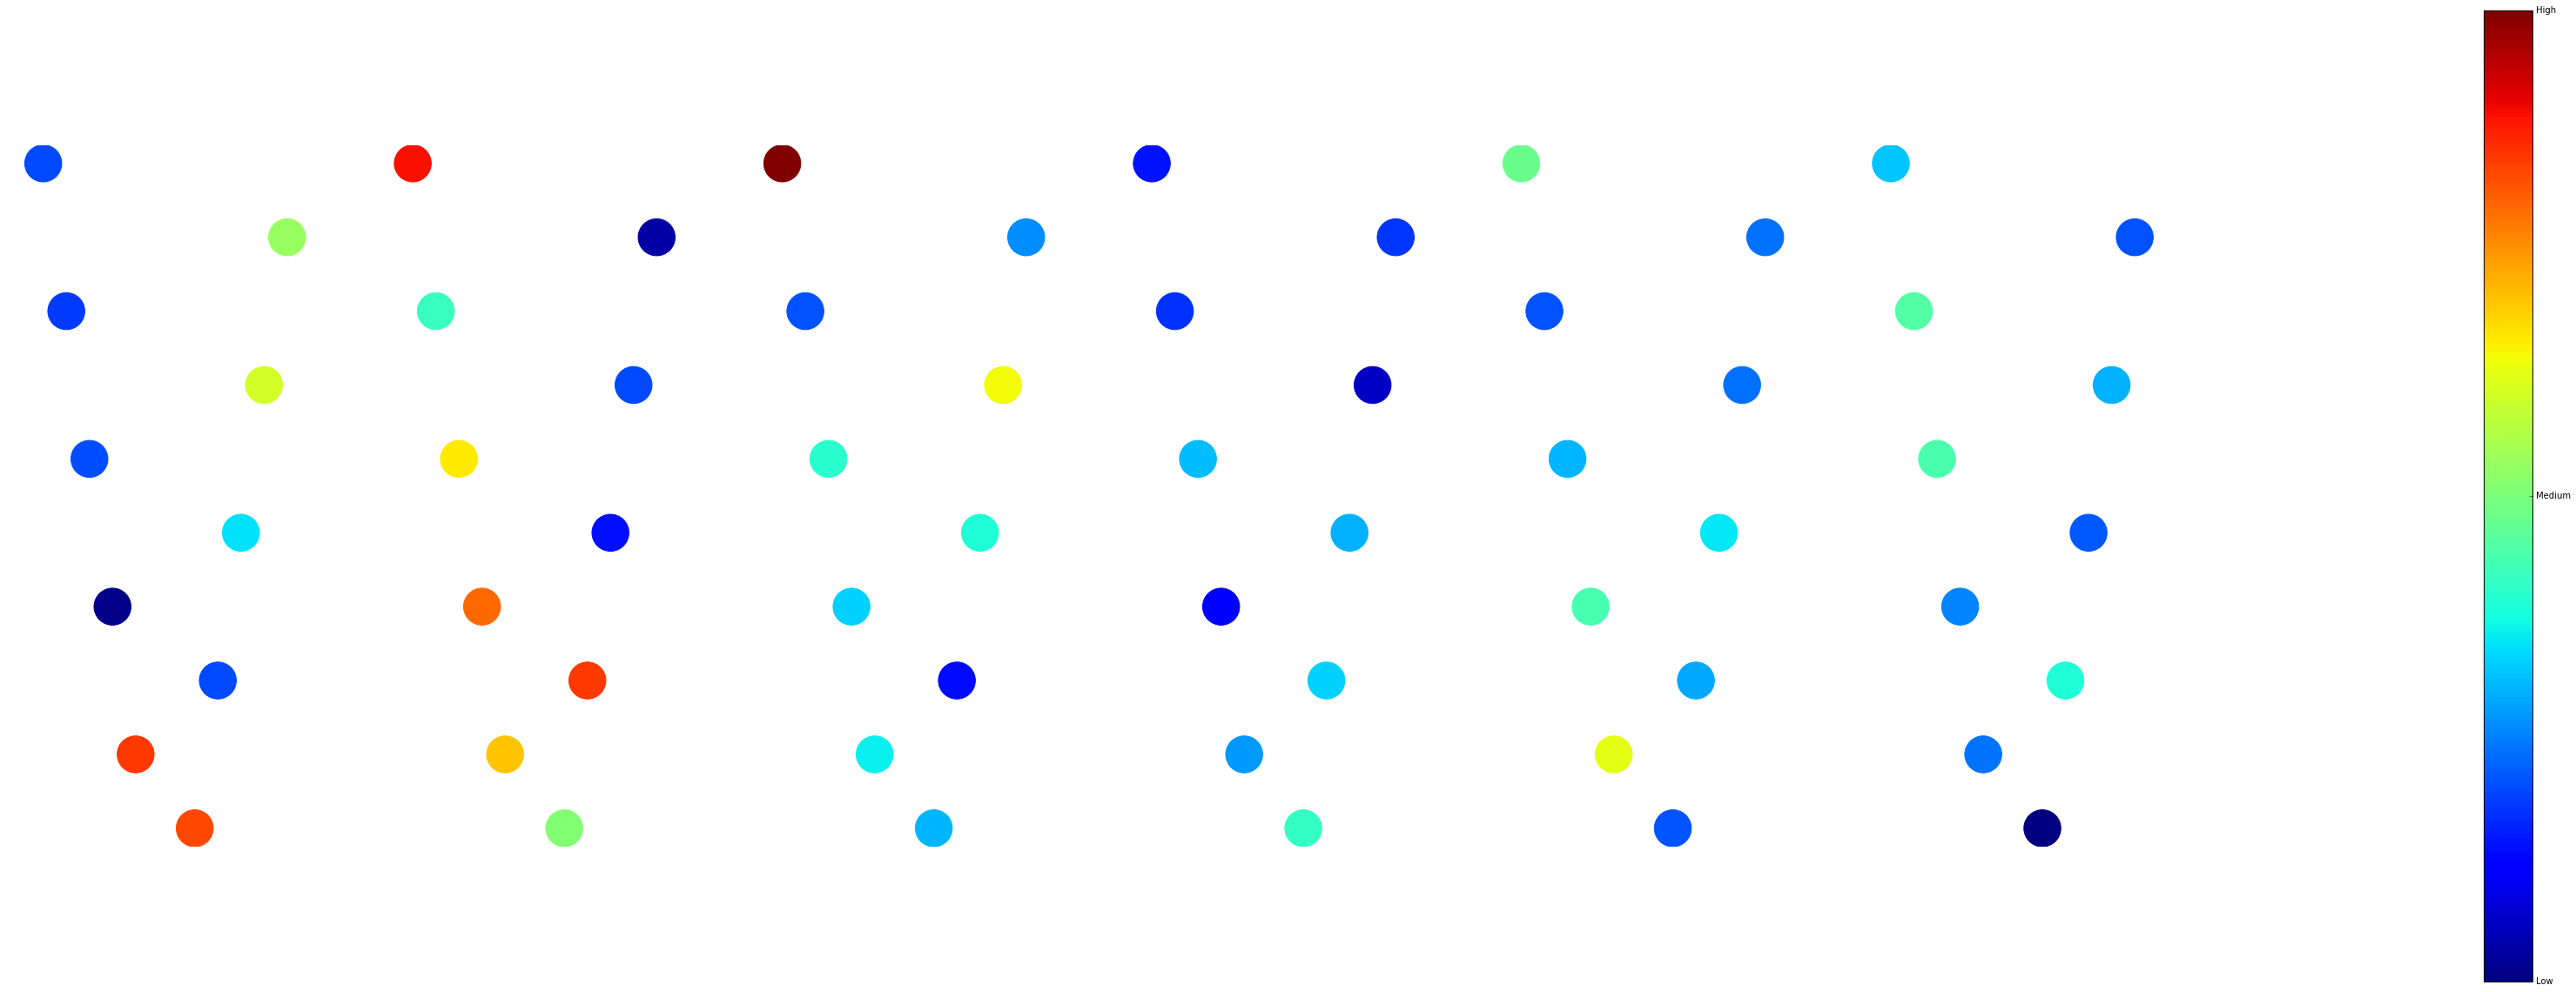

'28:57'

In [6]:
import time
start_time = time.time()

a=cm.get_median_amplitude_group()
cm.plot_median_amplitude(amplitudes=a)

elapsed_time = time.time() - start_time
time.strftime("%M:%S", time.gmtime(elapsed_time))